# Life Expectancy & GDP Relation Analisys

### Importing Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels as sts
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Data Extraction

In [3]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Data Cleaning

In [54]:
# Checking if there are mising values in the dataframe
df.isnull().any()

Country                             False
Year                                False
Life expectancy at birth (years)    False
GDP                                 False
GDP_normalized                      False
Life_expectancy_normalized          False
dtype: bool

#### Describing Data

In [5]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


## Data Visualization

In [6]:
columns = df.columns
print(columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


In [7]:
countries = pd.unique(df.Country)
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


 ### Countries GDP over Years

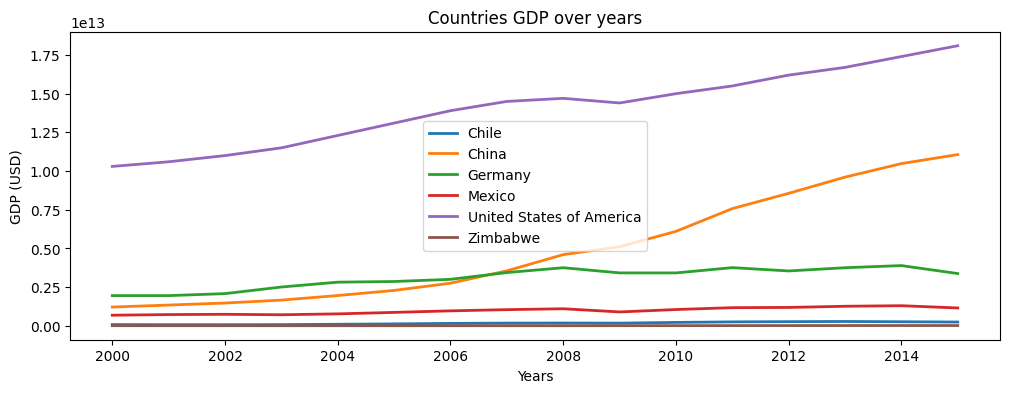

<Figure size 640x480 with 0 Axes>

In [55]:
plt.figure(figsize=(12, 4))

for i in countries:
    plt.plot(df.Year[df.Country == i], df.GDP[df.Country == i], label=i, linewidth=2)
    plt.title(f"Countries GDP over years")
    plt.ylabel('GDP (USD)')
    plt.xlabel('Years')
    plt.legend()
    
plt.show()
plt.clf()

### Countries Life Expectancy over Years

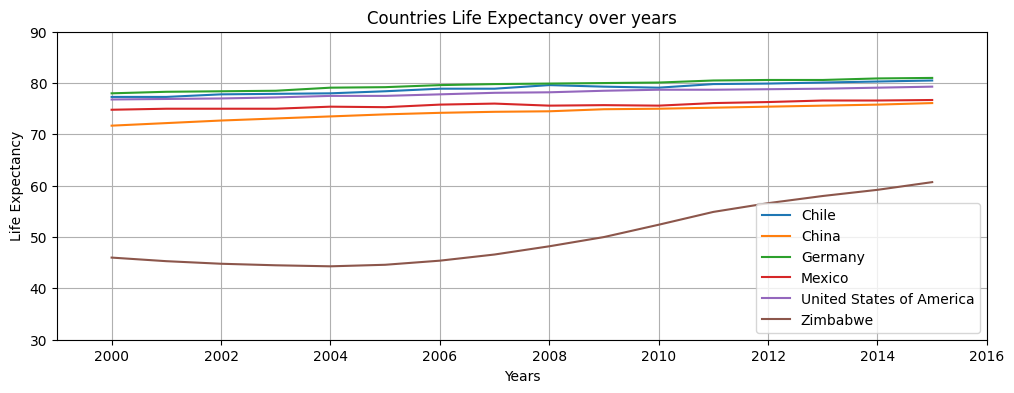

<Figure size 640x480 with 0 Axes>

In [56]:
plt.figure(figsize=(12, 4))

for i in countries:
    plt.plot(df.Year[df.Country == i], df['Life expectancy at birth (years)'][df.Country == i], label=i)
    plt.title(f"Countries Life Expectancy over years")
    plt.ylabel('Life Expectancy')
    plt.xlabel('Years')
    plt.axis([1999,2016,30,90])
    plt.legend()

plt.grid()
plt.show()
plt.clf()

#### Normalizing Data

In [14]:
scaler = MinMaxScaler()
df['GDP_normalized'] = scaler.fit_transform(df[['GDP']])
df['Life_expectancy_normalized'] = scaler.fit_transform(df[['Life expectancy at birth (years)']])
df.head()

,Country,Year,Life expectancy at birth (years),GDP,GDP_normalized,Life_expectancy_normalized
0,Chile,2000,77.3,7.786093e+10,0.004059,0.899183
1,Chile,2001,77.3,7.097992e+10,0.003678,0.899183
2,Chile,2002,77.8,6.973681e+10,0.003610,0.912807
3,Chile,2003,77.9,7.564346e+10,0.003936,0.915531
4,Chile,2004,78.0,9.921039e+10,0.005239,0.918256


### GDP & Life Expectancy Correlation

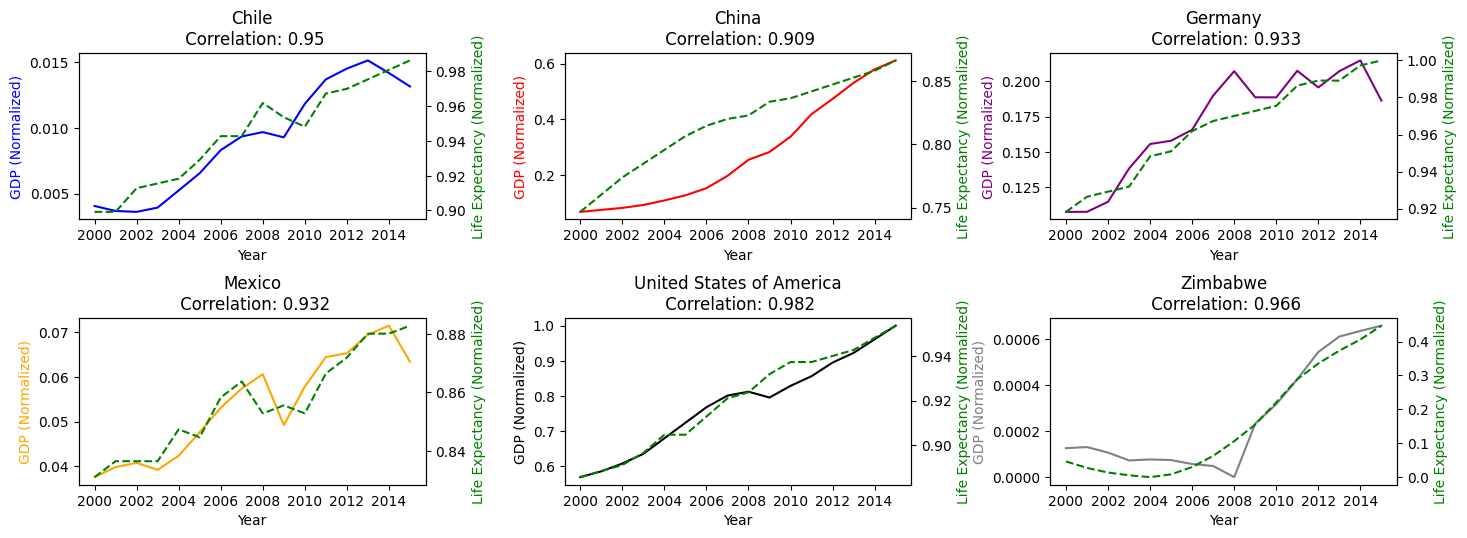

<Figure size 640x480 with 0 Axes>

In [44]:
countries = pd.unique(df.Country)
years = [i for i in pd.unique(df.Year) if i%2 == 0]
colors = ['blue', 'red', 'purple', 'orange', 'black', 'grey']

# Creating a figure with 6 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

for i, country in enumerate(countries):
    ax1 = axes[i // 3, i % 3]  # Locating the subplot 
    df_country = df[df['Country'] == country]

    gdp_le_corr = round(df_country['GDP'].corr(df_country['Life_expectancy_normalized']), 3)
    # GDP Normalized
    ax1.plot(df_country['Year'], df_country['GDP_normalized'], color=colors[i], label='GDP (Normalized)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP (Normalized)', color=colors[i])
    ax1.set_xticks(years)
    # Creating a second axe on the same subplot
    ax2 = ax1.twinx()
    ax2.plot(df_country['Year'], df_country['Life_expectancy_normalized'], color='green', linestyle='--', label='Life Expectancy (Normalized)')
    ax2.set_ylabel('Life Expectancy (Normalized)', color='green')
    ax1.set_title(f'{country}\n Correlation: {gdp_le_corr}')

plt.show()
plt.clf()

### Statistics Comparison

In [25]:
columns = ['Country', 'Mean GDP (Norm)', 'Mean Life Expectancy(Norm)']
stat_df = pd.DataFrame(columns=columns)

for i, country in enumerate(countries):
    mean_life = np.mean(df['Life_expectancy_normalized'][df.Country == country])
    mean_gdp = np.mean(df['GDP_normalized'][df.Country == country])
    stat_df.loc[i] = [country, mean_gdp, mean_life]

stat_df

,Country,Mean GDP (Norm),Mean Life Expectancy(Norm)
0,Chile,0.009139,0.943971
1,China,0.273730,0.816417
2,Germany,0.170780,0.963386
3,Mexico,0.053728,0.856097
4,United States of America,0.777570,0.919959
5,Zimbabwe,0.000257,0.157868


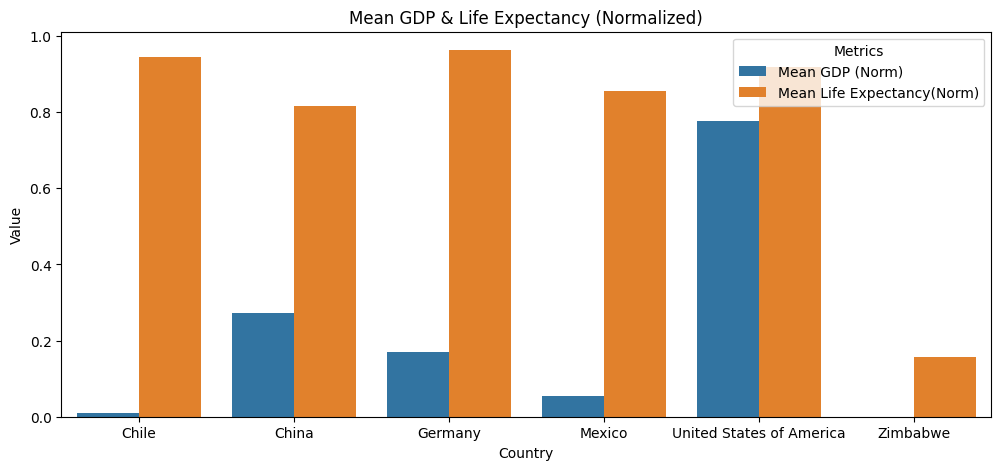

In [57]:
melted_df = pd.melt(stat_df, id_vars='Country', var_name='Metrics', value_name='Value')
plt.figure(figsize=(12, 5))
plt.title('Mean GDP & Life Expectancy (Normalized)')
sns.barplot(x='Country', y='Value', hue='Metrics', data=melted_df)
plt.show()

### 